# qBraid-SDK

### Search for find all quantum devices available through Qiskit, Cirq, and Braket

There's no such function in Qiskit or Cirq, only tedious work-arounds that require you to look into the docs anyways. For Braket, it requires making an authenticated API request through Boto3, and only includes credentialed devices in the response.

The qBraid-SDK lists all available QPU's and simulators available through Qiskit, Cirq, and Braket, all in one place.

In [61]:
from qbraid import get_devices

In [62]:
get_devices()

Provider,Name,qBraid ID,Status
AWS,Braket Default Simulator,aws_braket_default_sim,●
AWS,Density Matrix Simulator,aws_dm_sim,●
AWS,State Vector Simulator,aws_sv_sim,●
AWS,Tensor Network Simulator,aws_tn_sim,●
D-Wave,Advantage_system4,aws_dwave_advantage_system4,●
D-Wave,DW_2000Q_6,aws_dwave_2000Q_6,●
Google,Bristlecone,google_bristlecone,○
Google,Cirq Density Matrix Simulator,google_cirq_dm_sim,●
Google,Cirq Sparse Simulator,google_cirq_sparse_sim,●
Google,Foxtail,google_foxtail,○


Filter your device search with many different advanced query options! 

For example, let's find simulators containing keyword "State" available through AWS or IBM:

In [3]:
get_devices({"type": "Simulator", "name": {"$regex": "State"}, "vendor": {"$in": ["AWS", "IBM"]}})

Provider,Name,qBraid ID,Status
AWS,State Vector Simulator,aws_sv_sim,●
IBM,Aer State Vector Simulator,ibm_aer_sv_sim,●
IBM,BasicAer State Vector Simulator,ibm_basicaer_sv_sim,●
IBM,IBMQ Matrix Product State Simulator,ibm_q_mps_sim,●
IBM,IBMQ State Vector Simulator,ibm_q_sv_sim,●


This time, let's search for all gate-based QPUs with at least 5 qubits that are online

In [4]:
get_devices({"paradigm": "gate-based", "type": "QPU", "qubits": {"$gte": 5}, "status": "ONLINE"})

Provider,Name,qBraid ID,Status
IBM,IBMQ Belem,ibm_q_belem,●
IBM,IBMQ Lima,ibm_q_lima,●
IBM,IBMQ Quito,ibm_q_quito,●
IBM,IBMQ Santiago,ibm_q_manila,●
IonQ,IonQ Device,aws_ionq,●
Rigetti,Aspen-11,aws_rigetti_aspen_11,●


Not sure how to construct your query? 

In [5]:
help(get_devices)

Help on function get_devices in module qbraid.devices._utils.device_api:

get_devices(query=None)
    Displays a list of all supported devices matching given filters, tabulated by provider,
    name, and qBraid ID. Each device also has a status given by a solid green bubble or a hollow
    red bubble, indicating that the device is online or offline, respectively. You can narrow your
    device search by supplying a dictionary containing the desired criteria. Available filters
    include:
    
    * name (str)
    * vendor (str): AWS | IBM | Google
    * provider (str): AWS | IBM | Google | D-Wave | IonQ | Rigetti
    * type (str): QPU | Simulator
    * qubits (int)
    * paradigm (str): gate-based | quantum-annealer
    * requires_cred (bool): true | false
    * status (str): ONLINE | OFFLINE
    
    Here are a few example use cases:
    
    .. code-block:: python
    
        from qbraid import get_devices
    
        # Search for gate-based devices provided by Google that are onl

Recently added the ability to search by preferred software package, for instance

In [6]:
get_devices({"run_package": "qiskit", "requires_cred": "false"})

Provider,Name,qBraid ID,Status
IBM,Aer Default Simulator,ibm_aer_default_sim,●
IBM,Aer Pulse Simulator,ibm_aer_pulse_sim,●
IBM,Aer QASM Simulator,ibm_aer_qasm_sim,●
IBM,Aer State Vector Simulator,ibm_aer_sv_sim,●
IBM,Aer Unitary Simulator,ibm_aer_unitary_sim,●
IBM,BasicAer QASM Simulator,ibm_basicaer_qasm_sim,●
IBM,BasicAer State Vector Simulator,ibm_basicaer_sv_sim,●
IBM,BasicAer Unitary Simulator,ibm_basicaer_unitary_sim,●


### The qbraid device wrapper makes running circuits easy

In [63]:
from qbraid import device_wrapper, ibmq_least_busy_qpu
from qbraid.devices import update_config

Copy the desired Device ID into the device wrapper function and you're on your way.

In [9]:
qbraid_device = device_wrapper("ibm_aer_qasm_sim")
qbraid_device.info

{'qbraid_id': 'ibm_aer_qasm_sim',
 'name': 'Aer QASM Simulator',
 'provider': 'IBM',
 'paradigm': 'gate-based',
 'type': 'Simulator',
 'vendor': 'IBM',
 'run_package': 'qiskit',
 'status': 'ONLINE',
 'qubits': None}

In [66]:
ibmq_least_busy_qpu()  # requires ibmq token

'ibm_q_armonk'

In [77]:
qbraid_ibmq_device = device_wrapper("ibm_q_armonk")  # requires ibmq token
qbraid_ibmq_device.info

{'qbraid_id': 'ibm_q_armonk',
 'name': 'IBMQ Armonk',
 'provider': 'IBM',
 'paradigm': 'gate-based',
 'type': 'QPU',
 'type_qubits': 'superconducting',
 'date_deployed': '2019',
 'location': 'Armonk, NY, USA',
 'qubits': 1,
 'topology': 'Single qubit',
 'vendor': 'IBM',
 'run_package': 'qiskit',
 'status': 'ONLINE'}

In [78]:
from qiskit import QuantumCircuit
import numpy as np

qiskit_circuit = QuantumCircuit(1, 1)

qiskit_circuit.h(0)
qiskit_circuit.ry(np.pi/4, 0)
qiskit_circuit.rz(np.pi/2, 0)
qiskit_circuit.measure(0, 0)

qiskit_circuit.draw()

┌───┐┌─────────┐┌─────────┐┌─┐
  q: ┤ H ├┤ Ry(π/4) ├┤ Rz(π/2) ├┤M├
     └───┘└─────────┘└─────────┘└╥┘
c: 1/════════════════════════════╩═
                                 0

Initialize quantum jobs and collect results, with the ability to extract wrapped objects at any step

In [79]:
shots = 2**10

qbraid_ibmq_job = qbraid_device.run(qiskit_circuit, shots=shots)
# qbraid_job.vendor_jlo  # vendor job-like-object

In [80]:
qbraid_ibmq_job.status()

<JobStatus.QUEUED: 1>

### Run your circuit on any device and compare results

In [81]:
qbraid_google_device = device_wrapper("google_cirq_dm_sim")

In [84]:
qbraid_aws_device = device_wrapper("aws_dm_sim")  # requires aws credential

In [102]:
# update_config("AWS")

In [85]:
qbraid_google_job = qbraid_google_device.run(qiskit_circuit, shots=shots)
qbraid_aws_job = qbraid_aws_device.run(qiskit_circuit, shots=shots)

In [86]:
qbraid_google_result = qbraid_google_job.result()
qbraid_aws_result = qbraid_aws_job.result()

In [87]:
qbraid_ibmq_job.status()

<JobStatus.COMPLETED: 6>

In [88]:
qbraid_ibmq_result = qbraid_ibmq_job.result()

In [101]:
print(f"google simulator counts: {qbraid_google_result.measurement_counts()}")
print(f"aws simulator counts: {qbraid_aws_result.measurement_counts()}")
print(f"ibmq qpu counts: {qbraid_ibmq_result.measurement_counts()}")

google simulator counts: {'1': 885, '0': 139}
aws simulator counts: {'1': 871, '0': 153}
ibmq qpu counts: {'0': 213, '1': 811}


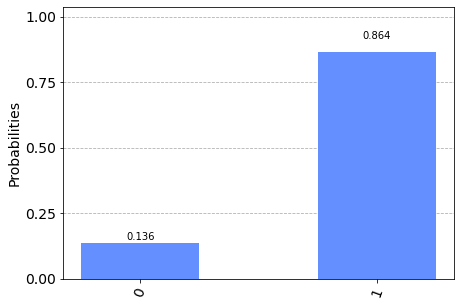

In [92]:
qbraid_google_result.plot_counts()

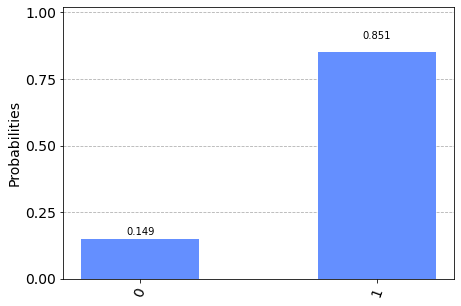

In [93]:
qbraid_aws_result.plot_counts()

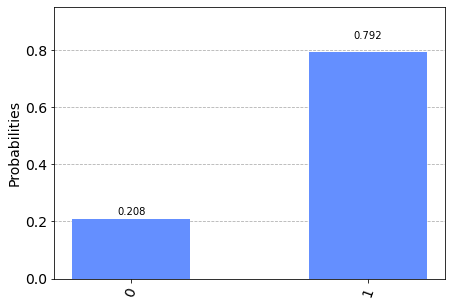

In [94]:
qbraid_ibmq_result.plot_counts()